<a href="https://colab.research.google.com/github/MehediTCF/AI-Lab/blob/main/HouseRentPredictionNeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
#load boston housing datasets from sklearn.datasets
from sklearn.datasets import load_boston
boston_data = load_boston()
print(boston_data)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

In [3]:
#transform datasets into dataframe
#feature_names = column names
#target = y or price
df_x = pd.DataFrame(boston_data.data, columns= boston_data.feature_names)
df_y = pd.DataFrame(boston_data.target)

In [4]:
df_x.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [5]:
df_x.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [7]:
#splitting into train and test set 
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size = 0.33, random_state=42)

In [8]:
import keras
from keras.models import Sequential
from keras.layers import *

In [10]:
def HousePredictModel():
  model = Sequential()

  # The Input Layer :
  model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))
  # The Hidden Layers :
  model.add(Dense(256, kernel_initializer='normal',activation='relu'))
  model.add(Dense(256, kernel_initializer='normal',activation='relu'))
  model.add(Dense(256, kernel_initializer='normal',activation='relu'))
  model.add(Dense(256, kernel_initializer='normal',activation='relu'))
  model.add(Dense(256, kernel_initializer='normal',activation='relu'))
  # The Output Layer :
  model.add(Dense(1, kernel_initializer='normal',activation='linear'))
  # Compile the network :
  model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
  return model

In [11]:
model = HousePredictModel()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1792      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_5 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 2

In [12]:
model.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 100)

Epoch 1/100
23/23 [==============================] - 2s 35ms/step - loss: 13.4135 - mean_absolute_error: 13.4135 - val_loss: 5.7825 - val_mean_absolute_error: 5.7825
Epoch 2/100
23/23 [==============================] - 0s 7ms/step - loss: 7.2994 - mean_absolute_error: 7.2994 - val_loss: 6.3846 - val_mean_absolute_error: 6.3846
Epoch 3/100
23/23 [==============================] - 0s 7ms/step - loss: 6.9377 - mean_absolute_error: 6.9377 - val_loss: 5.5846 - val_mean_absolute_error: 5.5846
Epoch 4/100
23/23 [==============================] - 0s 8ms/step - loss: 6.0489 - mean_absolute_error: 6.0489 - val_loss: 7.4139 - val_mean_absolute_error: 7.4139
Epoch 5/100
23/23 [==============================] - 0s 7ms/step - loss: 5.8818 - mean_absolute_error: 5.8818 - val_loss: 5.6139 - val_mean_absolute_error: 5.6139
Epoch 6/100
23/23 [==============================] - 0s 7ms/step - loss: 5.7517 - mean_absolute_error: 5.7517 - val_loss: 5.0124 - val_mean_absolute_error: 5.0124
Epoch 7/100
23/23 [

In [13]:
prediction = model.predict(X_test)


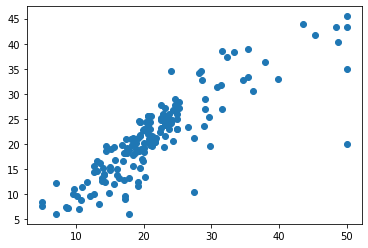

In [19]:
plt.scatter(y_test,prediction)